In [1]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.finansforbundet.no/lonn/lonnsregulativet/')
table_html=tables[0]

print(str(table_html)[:1000])

<table class="has-fixed-layout"><tbody><tr><td class="has-text-align-left" data-align="left"><strong>Lønnstrinn</strong></td><td class="has-text-align-left" data-align="left"><strong>Pr. år</strong></td><td class="has-text-align-left" data-align="left"><strong>Pr. mnd (1)</strong></td><td class="has-text-align-left" data-align="left"><strong>Pr. time (2)</strong></td></tr><tr><td class="has-text-align-left" data-align="left">22</td><td class="has-text-align-left" data-align="left">353 251</td><td class="has-text-align-left" data-align="left">29 438</td><td class="has-text-align-left" data-align="left">183,98</td></tr><tr><td class="has-text-align-left" data-align="left">23</td><td class="has-text-align-left" data-align="left">357 506</td><td class="has-text-align-left" data-align="left">29 792</td><td class="has-text-align-left" data-align="left">186,20</td></tr><tr><td class="has-text-align-left" data-align="left">24</td><td class="has-text-align-left" data-align="left">361 353</td><t

In [2]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    table=[]
    for row in html.find_all('tr'):
        r=[]
        cells=row.find_all('td')
        
        if len(cells)==0:
            cells=row.find_all('th')
            
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

print(str(table)[:1000])

[['Lønnstrinn', 'Pr. år', 'Pr. mnd(1)', 'Pr. time(2)'], ['22', '353 251', '29 438', '183,98'], ['23', '357 506', '29 792', '186,20'], ['24', '361 353', '30 113', '188,20'], ['25', '365 686', '30 474', '190,46'], ['26', '370 047', '30 837', '192,73'], ['27', '374 548', '31 212', '195,08'], ['28', '380 171', '31 681', '198,01'], ['29', '386 025', '32 169', '201,05'], ['30', '391 886', '32 657', '204,11'], ['31', '396 720', '33 060', '206,63'], ['32', '402 924', '33 577', '209,86'], ['33', '409 128', '34 094', '213,09'], ['34', '415 360', '34 613', '216,33'], ['35', '421 677', '35 140', '219,62'], ['36', '429 301', '35 775', '223,59'], ['37', '436 929', '36 411', '227,57'], ['38', '442 459', '36 872', '230,45'], ['39', '450 270', '37 523', '234,52'], ['40', '458 120', '38 177', '238,60'], ['41', '466 144', '38 845', '242,78'], ['42', '474 008', '39 501', '246,88'], ['43', '481 868', '40 156', '250,97'], ['44', '489 931', '40 828', '255,17'], ['45', '497 987', '41 499', '259,37'], ['46', '

In [3]:
';'.join(table[0])

'Lønnstrinn;Pr. år;Pr. mnd(1);Pr. time(2)'

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('lonn.csv',table)

In [5]:
import pandas as pd
k=pd.read_csv('lonn.csv', delimiter=';')
k

,Lønnstrinn,Pr. år,Pr. mnd(1),Pr. time(2)
0,22,353 251,29 438,"183,98"
1,23,357 506,29 792,"186,20"
2,24,361 353,30 113,"188,20"
3,25,365 686,30 474,"190,46"
4,26,370 047,30 837,"192,73"
...,...,...,...,...
60,82,918 899,76 575,"478,59"
61,83,931 113,77 593,"484,95"
62,84,943 328,78 611,"491,32"
63,85,955 543,79 629,"497,68"


In [6]:
k['Lønnstrinn'].replace(' ','', regex=True, inplace=True)
k['Pr. år'].replace(' ','', regex=True, inplace=True)
k['Pr. mnd(1)'].replace(' ','', regex=True, inplace=True)
k['Pr. time(2)'].replace(' ','', regex=True, inplace=True)
k['Pr. time(2)'].replace(',','.', regex=True, inplace=True)
k

,Lønnstrinn,Pr. år,Pr. mnd(1),Pr. time(2)
0,22,353251,29438,183.98
1,23,357506,29792,186.20
2,24,361353,30113,188.20
3,25,365686,30474,190.46
4,26,370047,30837,192.73
...,...,...,...,...
60,82,918899,76575,478.59
61,83,931113,77593,484.95
62,84,943328,78611,491.32
63,85,955543,79629,497.68


In [7]:
k['Lønnstrinn'] = k['Lønnstrinn'].apply(pd.to_numeric,errors='coerce')
k['Pr. år'] = k['Pr. år'].apply(pd.to_numeric,errors='coerce')
k

,Lønnstrinn,Pr. år,Pr. mnd(1),Pr. time(2)
0,22,353251,29438,183.98
1,23,357506,29792,186.20
2,24,361353,30113,188.20
3,25,365686,30474,190.46
4,26,370047,30837,192.73
...,...,...,...,...
60,82,918899,76575,478.59
61,83,931113,77593,484.95
62,84,943328,78611,491.32
63,85,955543,79629,497.68


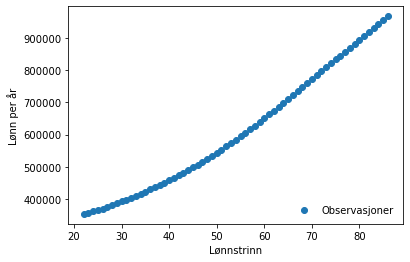

In [8]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Lønn per år')
ax.set_xlabel('Lønnstrinn')

#plotting the function:
ax.scatter(k['Lønnstrinn'], k['Pr. år'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

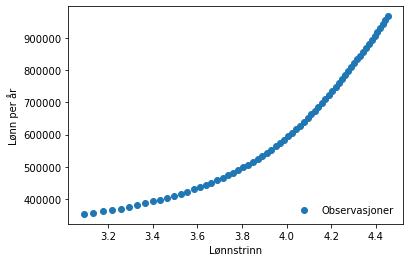

In [9]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Lønn per år')
ax.set_xlabel('Lønnstrinn')

#plotting the function:
ax.scatter(np.log(k['Lønnstrinn']), k['Pr. år'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [10]:
y=k['Pr. år']
pd.DataFrame(y)

,Pr. år
0,353251
1,357506
2,361353
3,365686
4,370047
...,...
60,918899
61,931113
62,943328
63,955543


In [11]:
x=pd.DataFrame(np.log(k['Lønnstrinn']))
x['intercept']=1
x

,Lønnstrinn,intercept
0,3.091042,1
1,3.135494,1
2,3.178054,1
3,3.218876,1
4,3.258097,1
...,...,...
60,4.406719,1
61,4.418841,1
62,4.430817,1
63,4.442651,1


In [12]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                            OLS Regression Results                            
Dep. Variable:                 Pr. år   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     647.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.61e-35
Time:                        12:24:05   Log-Likelihood:                -802.87
No. Observations:                  65   AIC:                             1610.
Df Residuals:                      63   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Lønnstrinn  4.682e+05   1.84e+04     25.440      0.0

In [13]:
res.params

Lønnstrinn    4.682057e+05
intercept    -1.222980e+06
dtype: float64

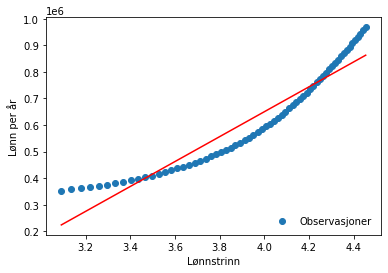

In [14]:
x=np.linspace(min(np.log(k['Lønnstrinn'])), max(np.log(k['Lønnstrinn'])), 100)

regression_line=res.params['intercept']+res.params['Lønnstrinn']*x

ax.plot(x, regression_line,color='red')
fig

Regressjonsmodellen viser en sammenheng mellom lønnstrinn og lønn per år. Det er en jevn stigning i henhold til lønnstrinn. Høyere lønnstrinn vil tilsi en høyere lønn.